In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Option:
    def __init__(self, policy):
        self.policy = policy

    def choose_action(self, state, Q_actions):
        return self.policy[state]

In [ ]:
def run_experiment(seed):
    np.random.seed(seed)
    env = gym.make('Taxi-v3')

    options = [Option(np.random.randint(0, env.action_space.n, env.observation_space.n)) for _ in range(4)]

    Q_options = np.zeros((env.observation_space.n, len(options)))
    Q_actions = np.zeros((env.observation_space.n, env.action_space.n))

    epsilon = 0.1
    alpha = 0.1
    gamma = 0.9
    num_episodes = 1000

    total_rewards = []
    q_values = {'options': [], 'actions': []}  # Collect Q-values for options and actions
    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                if np.random.rand() < epsilon:
                    option = np.random.choice(options)
                    action = option.choose_action(state, Q_actions)
                else:
                    action = np.argmax(Q_actions[state])

            next_state, reward, done, _ = env.step(action)
            episode_reward += reward

            if isinstance(action, Option):
                option_idx = options.index(action)
                Q_options[state, option_idx] += alpha * (reward + gamma * np.max(Q_actions[next_state]) - Q_options[state, option_idx])
            else:
                Q_actions[state, action] += alpha * (reward + gamma * np.max(Q_actions[next_state]) - Q_actions[state, action])

            state = next_state

            if done:
                break

        total_rewards.append(episode_reward)

        # Collect Q-values every 100 episodes
        if episode % 100 == 0:
            q_values['options'].append(Q_options.copy())
            q_values['actions'].append(Q_actions.copy())

    return total_rewards, q_values


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


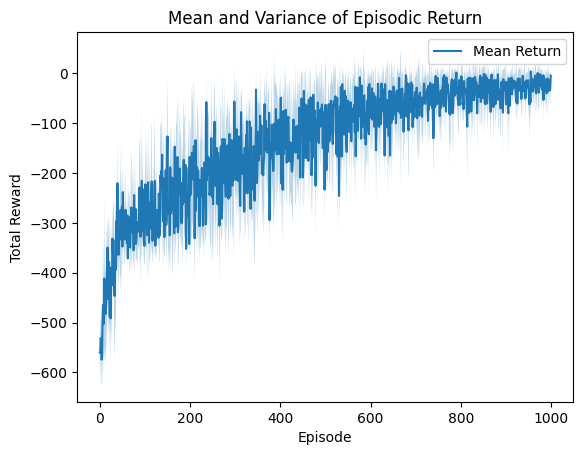

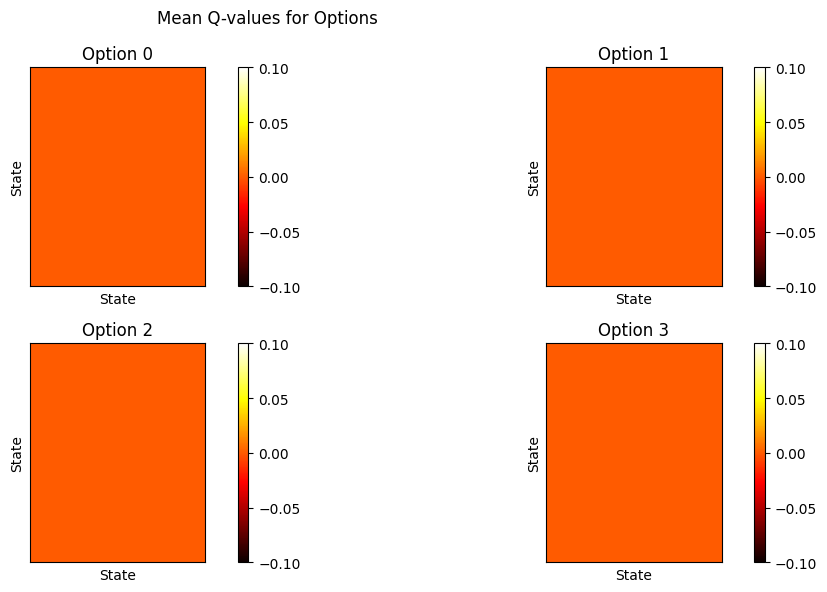

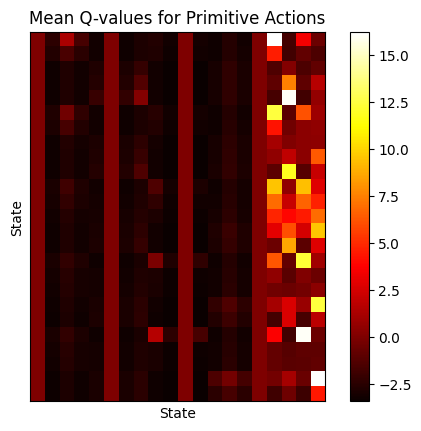

In [ ]:
num_experiments = 5
num_episodes = 1000

all_returns = np.zeros((num_experiments, num_episodes))
all_q_values = {'options': [], 'actions': []}
for i in range(num_experiments):
    returns, q_values = run_experiment(seed=i)
    all_returns[i, :] = returns
    all_q_values['options'].extend(q_values['options'])
    all_q_values['actions'].extend(q_values['actions'])

# Calculate mean and variance across experiments for returns
mean_returns = np.mean(all_returns, axis=0)
variance_returns = np.var(all_returns, axis=0)

# Plot mean and variance of returns
plt.plot(mean_returns, label='Mean Return')
plt.fill_between(range(num_episodes), mean_returns - np.sqrt(variance_returns), mean_returns + np.sqrt(variance_returns), alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Mean and Variance of Episodic Return')
plt.legend()
plt.show()

# Calculate mean Q-values across experiments for options
mean_Q_options = np.mean(all_q_values['options'], axis=0)

# Visualize Q-values for options
plt.figure(figsize=(12, 6))
for idx in range(mean_Q_options.shape[1]):
    plt.subplot(2, 2, idx+1)
    plt.imshow(mean_Q_options[:, idx].reshape(25, 20), cmap='hot', interpolation='nearest')
    plt.title(f'Option {idx}')
    plt.colorbar()
    plt.xlabel('State')
    plt.ylabel('State')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Mean Q-values for Options')
plt.tight_layout()
plt.show()

# Calculate mean Q-values across experiments for actions
mean_Q_actions = np.mean(all_q_values['actions'], axis=0)

# Visualize Q-values for primitive actions
plt.imshow(np.max(mean_Q_actions, axis=1).reshape(25, 20), cmap='hot', interpolation='nearest')
plt.title('Mean Q-values for Primitive Actions')
plt.colorbar()
plt.xlabel('State')
plt.ylabel('State')
plt.xticks([])
plt.yticks([])
plt.show()